In [2]:
from feat import Detector
import os
import pandas as pd



c:\Users\AdrianLopez\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
import torchvision
import torch

print(torch.__version__)
print(torchvision.__version__)


2.2.2+cpu
0.17.2


In [4]:
detector = Detector()

In [9]:
# Ruta del directorio que contiene los archivos de vídeo
video_directory_input = '../../FirstImpression/final_subset'
video_directory_output = '../../Final_Balanced/PyFeat'

# Obtener la lista de archivos en el directorio
video_files = os.listdir(video_directory_input)

# Iterar sobre cada archivo de vídeo
for video_file in video_files:
    if not video_file.endswith('.mp4'):
        continue
    # Aplicar la función detector.detect_video() a cada archivo
    video_prediction = detector.detect_video(os.path.join(video_directory_input, video_file))

    #Era mejor asi solo guardabas los AUS
    df = video_prediction.aus
    #df.to_csv(os.path.join(video_directory, f'{os.path.splitext(video_file)[0]}.csv'), index=False)

    # Plot 
    #figs1 = video_prediction.plot_detections(poses=True)
    #figs2 = video_prediction.plot_detections(faces='aus', muscles=True)

    # Convertir el resultado en un DataFrame
    #df = pd.DataFrame(video_prediction)

    # Guardar el DataFrame como un archivo CSV
    df.to_csv(os.path.join(video_directory_output, f'{os.path.splitext(video_file)[0]}.csv'), index=False)

  0%|          | 0/459 [00:00<?, ?it/s]

100%|██████████| 459/459 [21:05<00:00,  2.76s/it]


In [1]:
video_directory_output = '../../Final_Balanced/PyFeat'
df.to_csv(os.path.join(video_directory_output, f'{os.path.splitext(video_file)[0]}.csv'), index=False)

NameError: name 'df' is not defined

In [5]:
# prefer to pandas read_csv
from feat.utils.io import read_feat

input_prediction = read_feat("C:/Users/AdrianLopez/OneDrive - Universidad Politécnica de Madrid/Documentos/Semestre7/Project/VisualFeaturesExtraction/FinalBalanced/PyFeat/4yogPbHFQ9o.002.csv")

# Show results
input_prediction.shape

(459, 687)

[<Figure size 1000x700 with 2 Axes>, <Figure size 1000x700 with 2 Axes>]

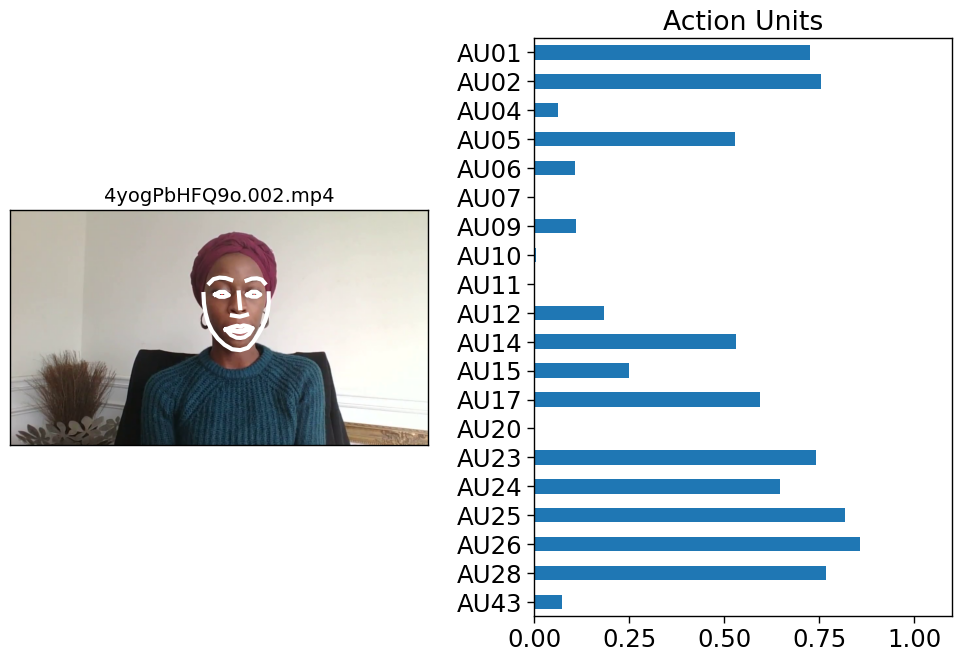

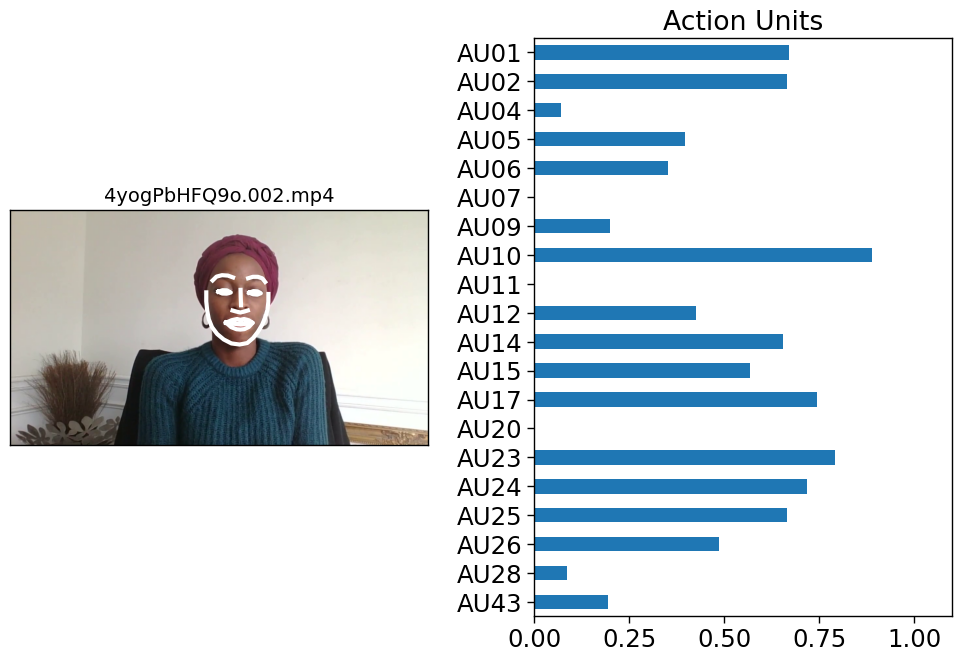

In [27]:
#figs = input_prediction.plot_detections(poses=True, emotion_barplot=False, muscles=True )

# Si en verdad procesamos el video entero
# # Frame 48 = ~0:02
# Frame 408 = ~0:14
# Frame numbers are the index so we can use .loc
input_prediction.loc[[0, 263]].plot_detections(emotion_barplot=False, faceboxes=False, gazes=False, poses=False, muscles=True)

[<Figure size 1000x700 with 2 Axes>]

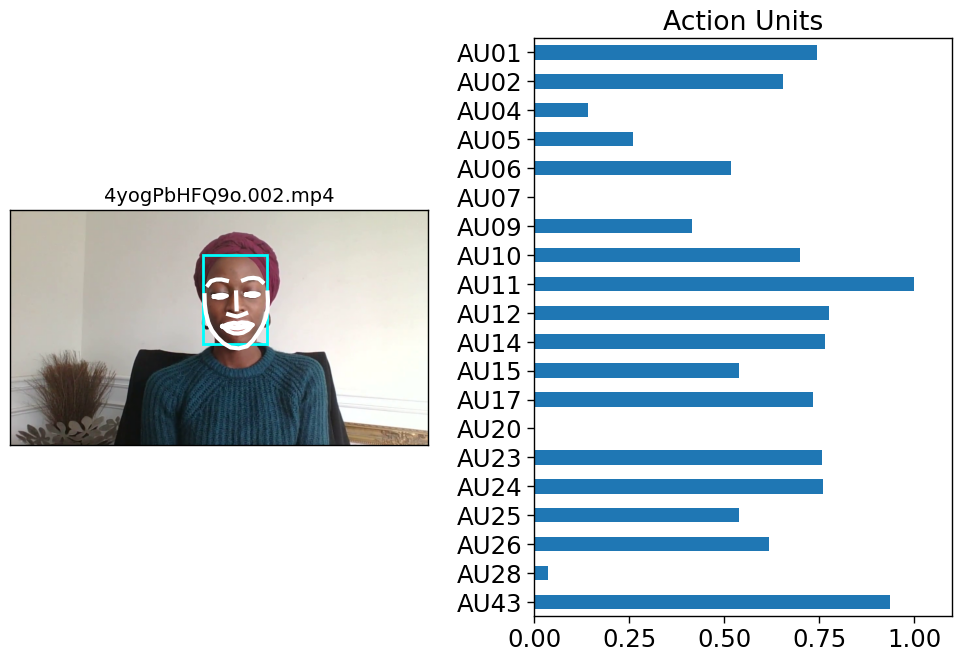

In [60]:
input_prediction.loc[317].plot_detections(emotion_barplot=False, au_barplot=True, gazes=True)

In [10]:
import cv2

# Load the video
video_path = "../../FirstImpression/subset/Tr3A7WODEuM.001.mp4"
cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, frame = cap.read()

# Display the first frame
cv2.imshow("First Frame", frame)
cv2.waitKey(0)

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


In [58]:
import cv2

def guardar_frame_especifico_como_jpg(video_path, output_path, frame_number):
    # Cargamos el video
    video = cv2.VideoCapture(video_path)
    
    # Verificamos si el video se abrió correctamente
    if not video.isOpened():
        print("No se pudo abrir el video.")
        return
    
    # Establecemos el frame a capturar
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    # Leemos el frame especificado
    ret, frame = video.read()
    
    # Verificamos si se pudo leer el frame
    if not ret:
        print(f"No se pudo leer el frame {frame_number} del video.")
        return
    
    # Guardamos el frame especificado como un archivo JPG
    cv2.imwrite(output_path, frame)
    
    # Liberamos el objeto VideoCapture
    video.release()
    
    print(f"El frame {frame_number} se ha guardado como {output_path}.")

# Ruta al video de entrada
video_path = '../../FirstImpression/final_subset/4yogPbHFQ9o.002.mp4'

# Ruta de salida para el frame 263
output_path = 'frame_317.jpg'

# Llamamos a la función para guardar el frame 263 como un archivo JPG
guardar_frame_especifico_como_jpg(video_path, output_path, 317)

El frame 317 se ha guardado como frame_317.jpg.


In [8]:
import pandas as pd
openface = pd.read_csv("C:/Users/AdrianLopez/OneDrive - Universidad Politécnica de Madrid/Documentos/Semestre7/Project/VisualFeaturesExtraction/FinalBalanced/OpenFace/CSV/4yogPbHFQ9o.002.csv")
openface.head()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.052668,0.312501,-0.948456,-0.139646,0.297427,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,2,0,0.033,0.98,1,0.054906,0.322242,-0.945064,-0.135070,0.320015,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,3,0,0.067,0.98,1,0.045851,0.326456,-0.944100,-0.152180,0.321172,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,4,0,0.100,0.98,1,0.024402,0.334379,-0.942123,-0.158905,0.305440,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,0,0.133,0.98,1,0.008780,0.331119,-0.943548,-0.148189,0.311845,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [29]:
# get row where AU01_r = 2.98 and AU02_r=4.53

row = openface[openface[' AU28_c'] == 1 ]
row[' AU14_r']

frame = 335

In [9]:
# Selecciona solas las que empiezen por AU
aus = [col for col in openface.columns if ' AU' in col]

# Crea el df solo con estas columnas
aus_df = openface.loc[:, aus]


In [44]:

aus_df[aus_df[' AU05_r'] == 3.30]

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
161,2.82,4.32,0.0,3.3,0.0,0.0,0.0,0.03,0.71,1.47,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [57]:
aus_df[aus_df[' AU14_r'] == 2.82]

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
317,2.92,4.47,0.0,0.67,0.0,0.0,0.0,0.35,1.31,2.82,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
331,2.91,4.51,0.0,0.34,0.0,0.0,0.0,0.42,1.63,2.82,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np

def find_similar_rows(df, values):
    # Convertir los valores dados en un vector
    values_vector = np.array(values)
    
    # Calcular la distancia euclidiana entre cada fila y el vector dado
    distances = df.apply(lambda row: np.linalg.norm(row.values - values_vector), axis=1)
    
    # Agregar una nueva columna con las distancias calculadas
    df['distance'] = distances
    
    # Ordenar el DataFrame en función de las distancias calculadas
    df_sorted = df.sort_values(by='distance')
    
    # Seleccionar las filas con las distancias más pequeñas
    return df_sorted

# Ejemplo de uso
values = [2.96,3.91,0,3.3,0,0,0,0,0,1.41,0,0,0,0.8,1.42,0.09,5,0]
similar_rows = find_similar_rows(df, values)
print(similar_rows)

In [50]:
aus_df.columns

Index([' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r',
       ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r',
       ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r', ' AU01_c',
       ' AU02_c', ' AU04_c', ' AU05_c', ' AU06_c', ' AU07_c', ' AU09_c',
       ' AU10_c', ' AU12_c', ' AU14_c', ' AU15_c', ' AU17_c', ' AU20_c',
       ' AU23_c', ' AU25_c', ' AU26_c', ' AU28_c', ' AU45_c'],
      dtype='object')